#Abstract
This dataset offers a detailed analysis of laptop specifications and prices from various manufacturers, showcasing the range available in the market. It includes information such as the manufacturer's name, laptop category, RAM size, weight, and price. The dataset also examines specific characteristics like the presence of a touchscreen, IPS technology, and the pixel density (PPI), which shed light on the quality of the laptop displays. Moreover, it classifies CPUs by their brand and outlines storage solutions through HDD and SSD capacities. The addition of GPU brands and the type of operating system further enriches the analysis, providing a comprehensive view of laptop performance and consumer preferences.



Install H2O Library

In [3]:
#Installing required package
!pip3 install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=30e0c84e0c15b4ed4408b5790ec2a9fe5dafdf0db765faa16ce57ded745fc5af
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


Importing the required library

In [4]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

Initialize the H2O

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps9b_ic3l
  JVM stdout: /tmp/tmps9b_ic3l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps9b_ic3l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_yt5804
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


#Data Preperation
For the preparation of our analysis, we'll be using a dataset obtained from Kaggle titled "Laptop Data," which has been cleaned and stored in a file named "laptop_data_cleaned.csv." This dataset encompasses a wide range of specifications and pricing information for laptops from multiple manufacturers, thereby illustrating the diversity in the laptop market. The dataset includes various attributes such as the company name, laptop type, RAM capacity, weight, price, and additional features like touchscreen capabilities, IPS technology, PPI density, CPU and GPU brands, storage options (HDD and SSD capacities), and operating system type. These attributes will enable us to explore and understand the factors influencing laptop specifications and market pricing.

We plan to use H2O's AutoML to train and tune a variety of models with the goal of identifying patterns and insights within the laptop market based on the dataset provided. The primary objectives will be to analyze the relationships between laptop specifications and their pricing, and to determine the key factors that drive laptop prices. This approach will allow us to develop a comprehensive understanding of the current trends and preferences in the laptop market.






Load the dataset as a H2OFrame


In [6]:
df = h2o.import_file('https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Describe the dataset. H2O provides 10 rows of sample data along with basic summary statistics for numerical columns.


In [7]:
df.describe(chunk_summary=True)

Rows:1273
Cols:13

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     15       14.4231             1.3 KB   3.75727
CXI           Sparse Integers            1        0.961538            108  B   0.300359
C1N           1-Byte Integers (w/o NAs)  48       46.1538             10.6 KB  30.3195
C1S           1-Byte Fractions           6        5.76923             1.4 KB   4.06041
C2            2-Byte Integers            10       9.61538             3.8 KB   10.735
C2S           2-Byte Fractions           8        7.69231             3.1 KB   8.94958
CUD           Unique Reals               8        7.69231             4.2 KB   12.0422
C8D           64-bit Reals               8        7.69231             10.5 KB  29.8356

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  35.1 KB  1273              8                              104
mean             35.1 KB  1273              8                              104
min              35.1 KB  1273              8                              104
max              35.1 KB  1273              8                              104
stddev           0  B     0                 0                              0
total            35.1 KB  1273              8                              104

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
type,enum,enum,int,real,real,int,int,real,enum,int,int,enum,enum
mins,,,2.0,0.69,9.134616325446665,0.0,0.0,90.58340172449304,,0.0,0.0,,
mean,,,8.447761194029852,2.0410997643362134,10.828218230869608,0.14689709347996857,0.27965435978004716,146.95081224719448,,413.71563236449333,186.25294579732918,,
maxs,,,64.0,4.7,12.69144112852859,1.0,1.0,352.4651472131677,,2000.0,1024.0,,
sigma,,,5.098770979625904,0.669241062186102,0.6195650221746962,0.35414242630983184,0.44900575691976796,42.92677535578158,,518.0544860514343,186.53157149150968,,
zeros,,,0,0,0,1086,917,0,,714,436,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Apple,Ultrabook,8.0,1.37,11.175754549129524,0.0,1.0,226.98300468106115,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,10.77677731765335,0.0,0.0,127.67794013309688,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,10.329931067029484,0.0,0.0,141.21199808219862,Intel Core i5,0.0,256.0,Intel,Others


Split the dataset into train and test set


In [8]:
col_types = df.types
numerical_cols = [col for col, type in col_types.items() if type in ['int', 'real']]
df_numerical = df[numerical_cols]
print(df_numerical)

  Ram    Weight     Price    TouchScreen    Ips      Ppi    HDD    SSD
    8      1.37  11.1758               0      1  226.983      0    128
    8      1.34  10.7768               0      0  127.678      0      0
    8      1.86  10.3299               0      0  141.212      0    256
   16      1.83  11.8145               0      1  220.535      0    512
    8      1.37  11.4731               0      1  226.983      0    256
    4      2.1    9.96703              0      0  100.455    500      0
   16      2.04  11.6441               0      1  220.535      0      0
    8      1.34  11.0306               0      0  127.678      0      0
   16      1.3   11.2854               0      0  157.351      0    512
    8      1.6   10.622                0      1  157.351      0    256
[1273 rows x 8 columns]



In [11]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

Train AutoML Models
Let's configure the AutoML training parameters.

max_models: Maximum number of models to train
balance_classes: set to True to balance the class labels for tasks with imbalance data
seed : Set for reproducibility
)

In [12]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

We can limit the amount of time spent on searching for the best model by limiting:

1. maximum number of models using max_models
2. total time spent using max_runtime_secs
3. time spend training any single model using max_runtime_secs_per_model


Start the training by specifying:
1. training_frame: the dataframe that contains training data -- train in our case
2. y: the column in the training_frame which contains the target variable -- Price in our case


In [13]:
aml.train(training_frame = train, y = 'Price')

AutoML progress: |███████████████
17:57:24.485: DeepLearning_1_AutoML_1_20240219_175630 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20240219_175630_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),21/40
# GBM base models (used / total),7/9
# XGBoost base models (used / total),14/28
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Interpreting Training Output for Laptop Price Prediction:

For the laptop dataset, we might train various models to predict the Price based on features like Company, TypeName, Ram, Weight, TouchScreen, Ips, Ppi, Cpu_brand, HDD, SSD, Gpu_brand, and Os. The performance metrics would help us understand how well our models can predict laptop prices, and they might include:

Mean Squared Error (MSE): Reflects the average of the squares of the errors between the predicted and actual log-transformed prices.

Root Mean Squared Error (RMSE): The square root of MSE, providing insight into the model's prediction accuracy in the same scale as the price.

Mean Absolute Error (MAE): The average absolute difference between predicted and actual prices, offering a straightforward interpretation of prediction accuracy.

Root Mean Squared Log Error (RMSLE): Especially relevant here due to the log transformation of the price, indicating the model's performance in terms of proportional errors.

R-squared (R^2): Indicates the proportion of variance in the laptop prices that is predictable from the features.

#Evaluation

For the laptop price prediction task using the dataset provided, the performance of the trained models is assessed and compared using H2O AutoML's leaderboard. This feature ranks models based on their Root Mean Squared Error (RMSE), with models showing the lowest RMSE at the top. RMSE is chosen for its relevance to regression tasks, as it quantifies the average difference between the predicted and actual prices, making it a key metric for evaluating model accuracy in predicting laptop prices.

In [14]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240219_175630,0.198701,0.0394822,0.149109,0.0166765,0.0394822
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_175630,0.202559,0.0410301,0.152525,0.0169831,0.0410301
XGBoost_3_AutoML_1_20240219_175630,0.208282,0.0433813,0.159039,0.0175012,0.0433813
XGBoost_grid_1_AutoML_1_20240219_175630_model_3,0.208743,0.0435738,0.156261,0.017525,0.0435738
GBM_5_AutoML_1_20240219_175630,0.208846,0.0436168,0.15622,0.0175059,0.0436168
GBM_grid_1_AutoML_1_20240219_175630_model_3,0.210448,0.0442883,0.159631,0.0176874,0.0442883
GBM_3_AutoML_1_20240219_175630,0.210628,0.0443641,0.156283,0.0176814,0.0443641
XGBoost_grid_1_AutoML_1_20240219_175630_model_13,0.210993,0.044518,0.160192,0.0177289,0.044518
XGBoost_grid_1_AutoML_1_20240219_175630_model_28,0.211817,0.0448663,0.160005,0.0178276,0.0448663
XGBoost_grid_1_AutoML_1_20240219_175630_model_4,0.2122,0.0450287,0.158645,0.0178318,0.0450287


Best Performing Model


In [15]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240219_175630


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  21/40
# GBM base models (used / total)      7/9
# XGBoost base models (used / total)  14/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00902903059038776
RMSE: 0.09502121126563143
MAE: 0.07197130072295677
RMSLE: 0.007987585090974058
Mean Residual Deviance: 0.00902903059038776
R^2: 0.9764798573093059
Null degrees of freedom: 10

How did AutoML pick this model?

H2O AutoML selects the best model from a given dataset through an automated and systematic process that involves training and evaluating a variety of machine learning models. The process for picking the best model, especially for a dataset like the one used for laptop price predictions, AutoML selects the model based on this rigorous process, aiming to balance accuracy, complexity, and generalization to new data. The selected model is the one that performs best on the validation sets according to the chosen evaluation metric, in this case, RMSE for the laptop price prediction dataset. This systematic approach allows AutoML to navigate through a vast model space efficiently, identifying the model that is most likely to provide accurate and reliable predictions for the given dataset.

Evaluating the best model on a holdout test set using the same evaluation metrics shown above.

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

RMSLE (Root Mean Squared Log Error)

R^2 (Coefficient of Determination)

AIC (Akaike Information Criterion)

In [16]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03699371104875366
RMSE: 0.19233749257166077
MAE: 0.14892934267248967
RMSLE: 0.016213493589635128
Mean Residual Deviance: 0.03699371104875366
R^2: 0.9032328483431511
Null degrees of freedom: 260
Residual degrees of freedom: 239
Null deviance: 99.77934507704035
Residual deviance: 9.655358583724706
AIC: -73.83300465401075

Explainability

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code



# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

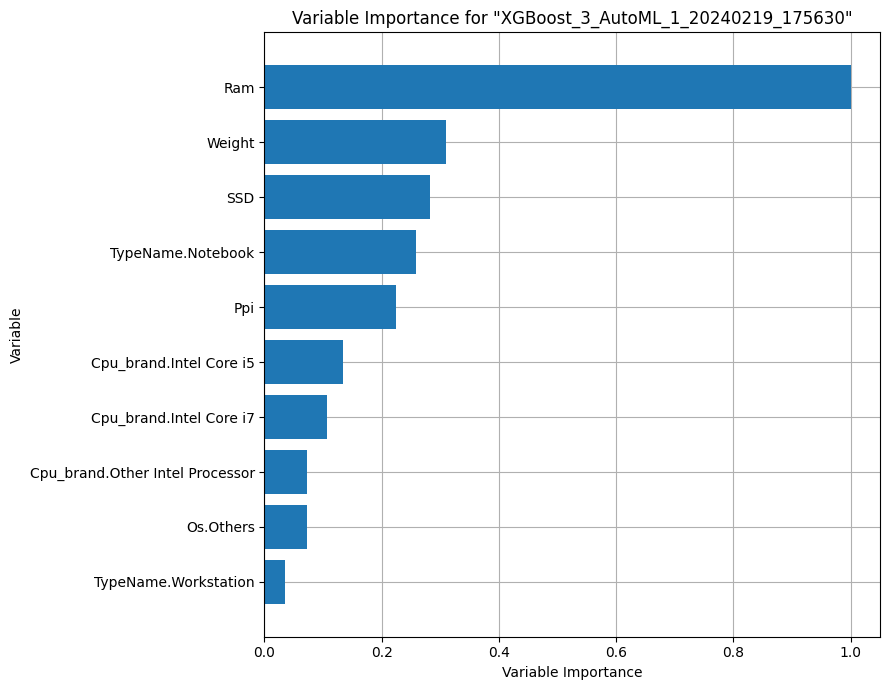

In [17]:
explain_model = aml.explain(frame = test, figsize = (9,7),include_explanations=['varimp'])

Interpreting Feature Importance:

- **RAM** has the greatest impact on the predicted price of the laptop. This indicates that the amount of RAM is a significant determinant of a laptop's price.
- **Weight** also has a high influence, suggesting that the portability factor, as dictated by the weight of the laptop, is a major pricing consideration.
- **SSD** capacity shows a strong influence on the price, which points to the importance of storage type and speed in determining the laptop's value.
- The feature **TypeName.Notebook** suggests that laptops classified specifically as notebooks have a distinct impact on the pricing, potentially due to their popularity or specific use-case designs.
- **PPI (Pixels Per Inch)** has a moderate level of importance, indicating that display quality is a noteworthy factor in pricing but not as critical as RAM or storage.
- The **Os.Others** category has some influence, indicating that the type of operating system can affect the price, but it is not among the top factors.
- **TypeName.Workstation** shows the least importance among the listed features, which could imply that while being a workstation impacts the price, it is less of a factor compared to the technical specifications like RAM and processor type.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

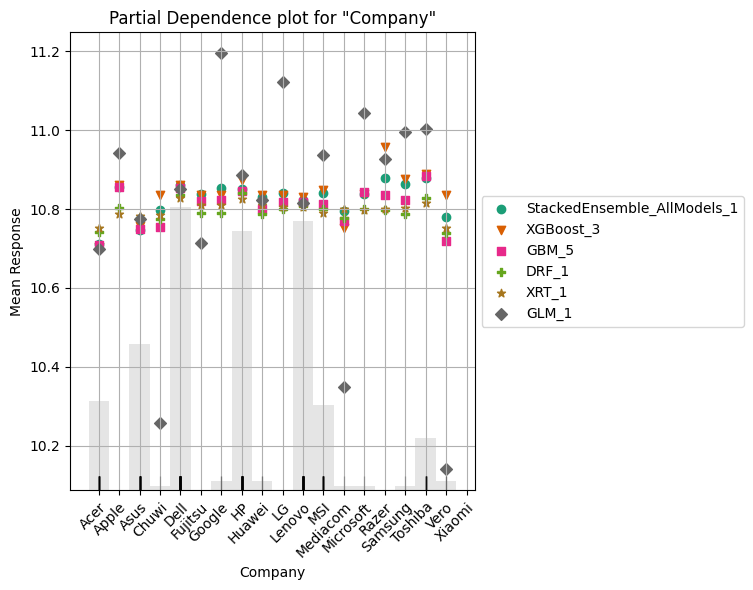

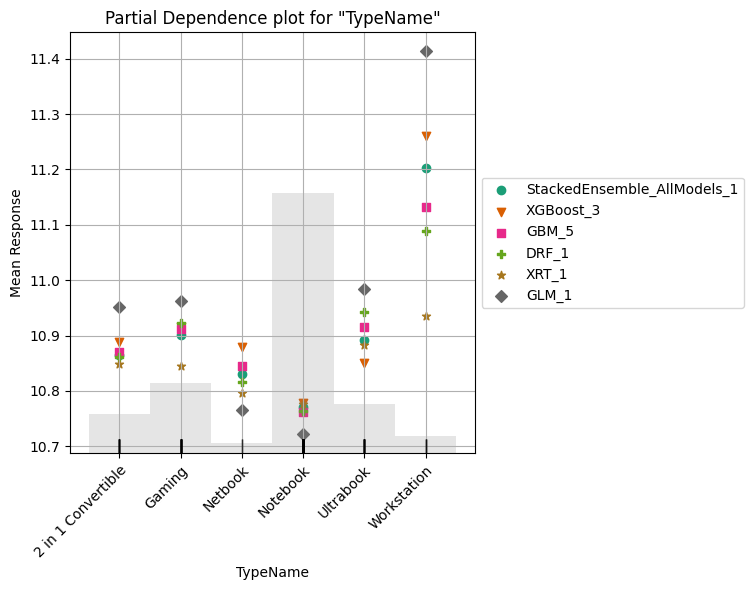

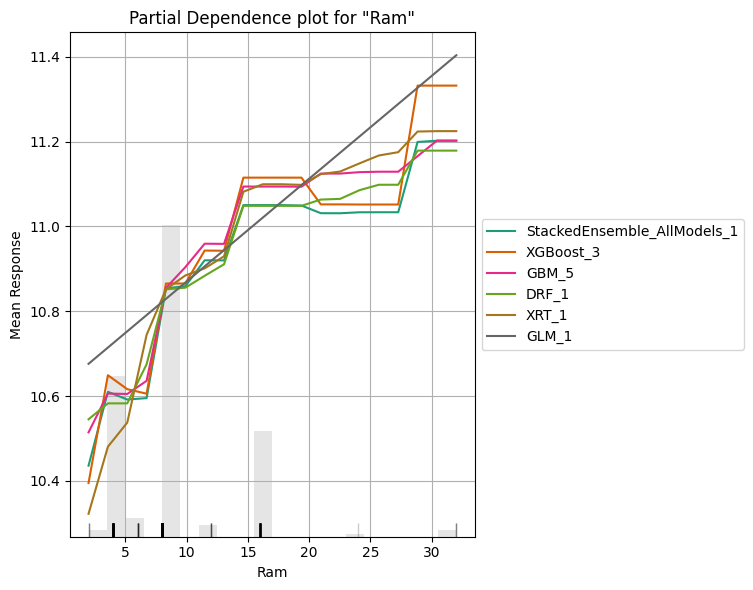

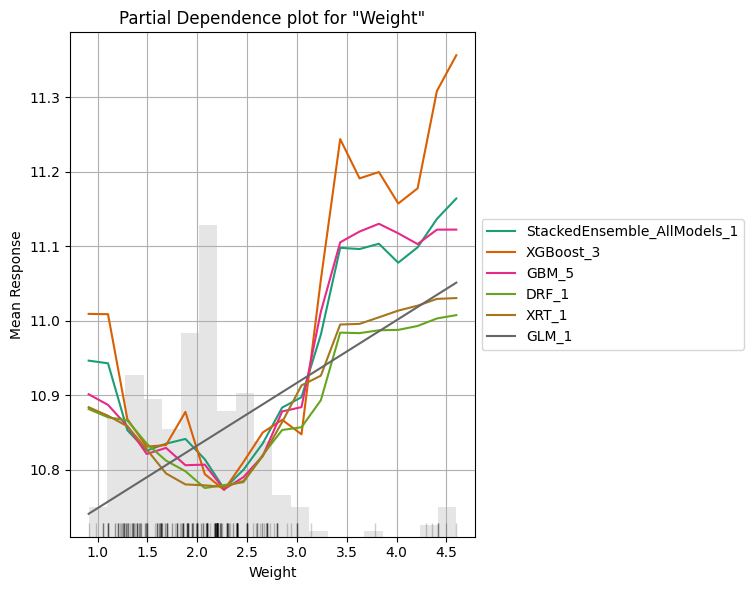

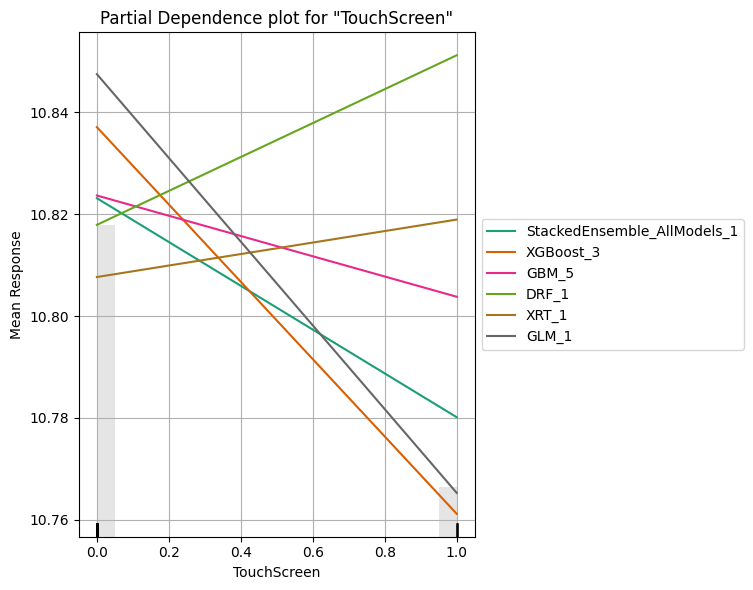

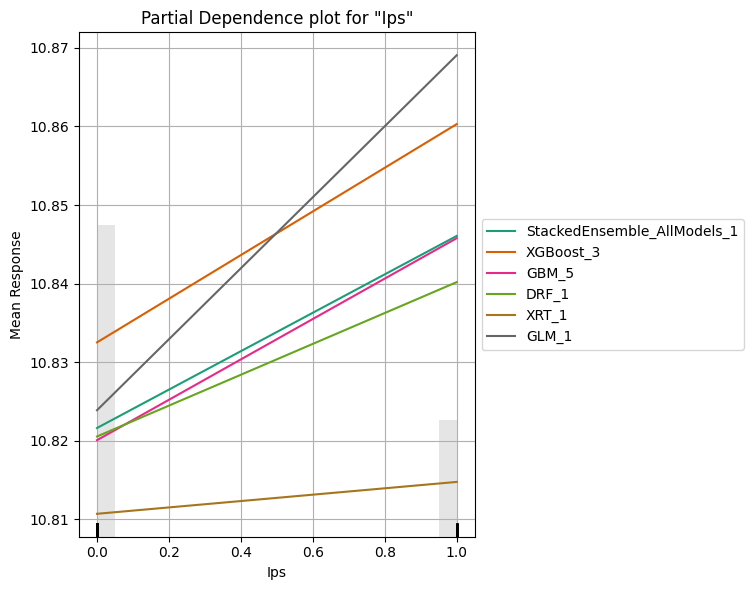

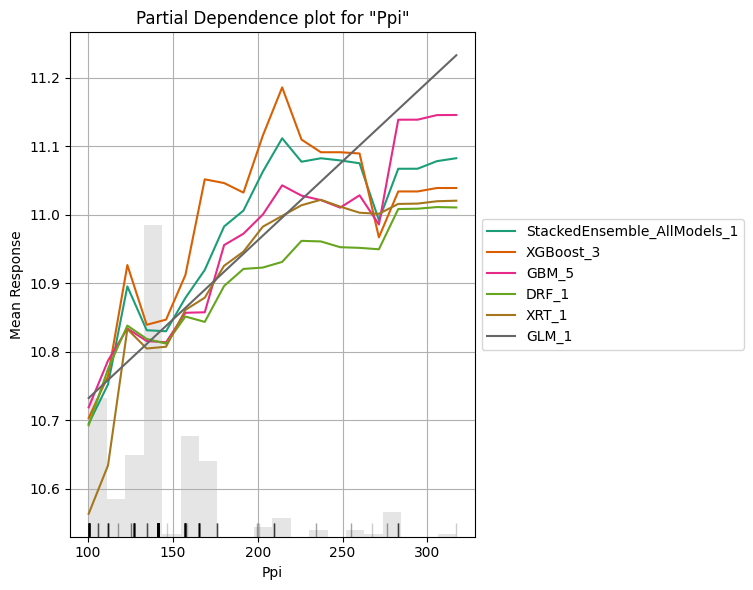

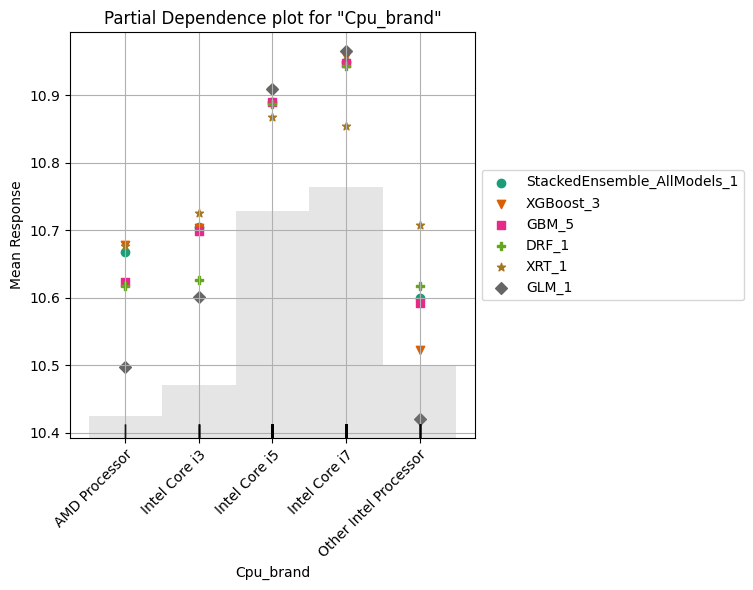

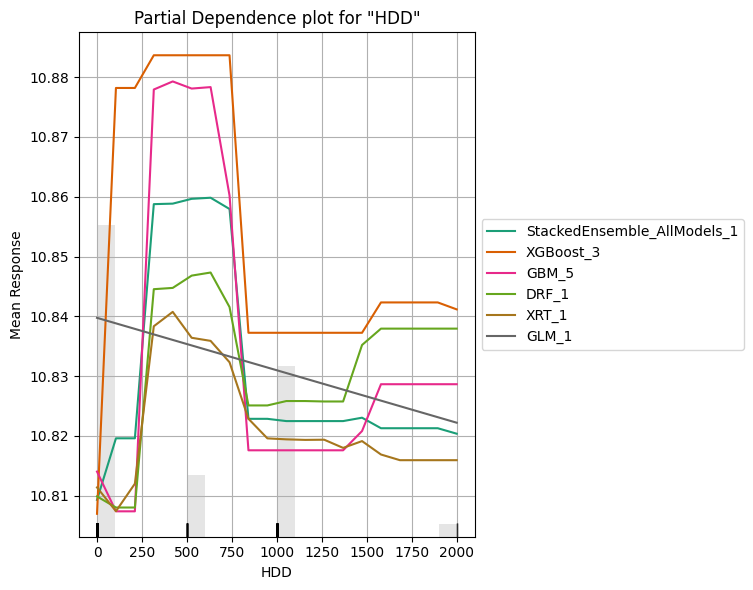

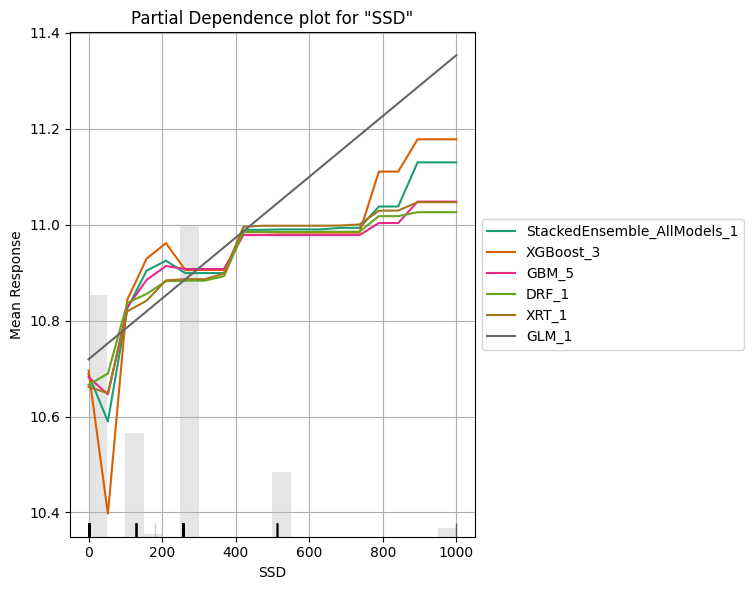

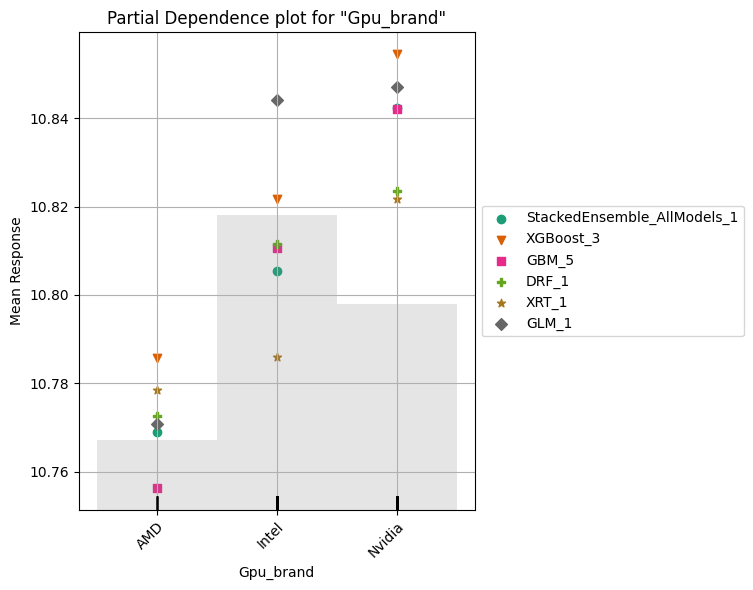

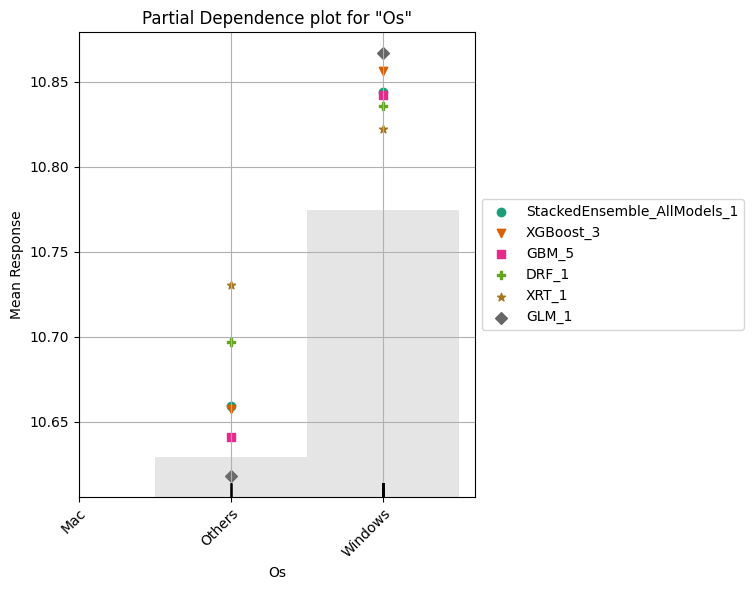

In [18]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

Local Explainability

In addition, it also provides local explainability for individual records. We can input a H2OFrame into the frame argument and indicate which row we would like explained using the row_index argument. In this case we are explaining the results for row 15 of the test frame.


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

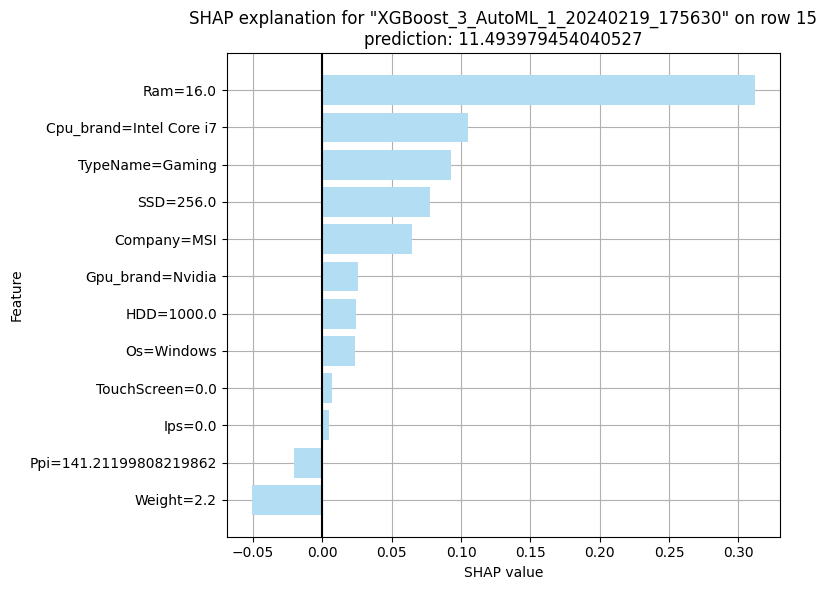

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

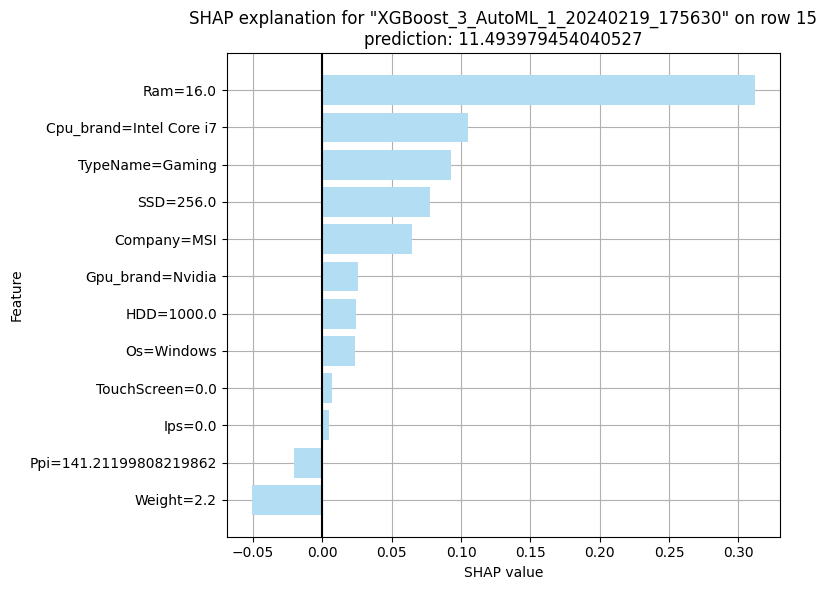

In [19]:
aml.explain_row(frame=test, row_index=15, figsize=(8, 6), exclude_explanations=["leaderboard"], top_n_features=10)



1Q) Is the relationship significant?

Ans) Yes, R^2 value is 0.903 thats over 90% and the values of MSE, RMSE, and MAE
are very low. This is a strong indication that the relationship is significant

2Q) Are any model assumptions violated?

Ans) No, It is multiple regression model combined with a Stacked Ensemble Regression and GLM metalearner that improves strong accuracy.

3Q) Is there any multicollinearity in the model?

Ans)  yes, we could know that all variables have correlationship with each other like Ram and Price have correlations are moderately strong and when you come to HDD and SSD it is weak.

4Q) In the multivariate models are predictor variables independent of all the other predictor variables?

Ans)Yes, the predictor variables are often not entirely independent from one another.

Ex. Ram and SSD

5Q) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ans)  the most significant predictor variable is RAM, the most insiginificant one is Typename.Workstation.

6Q) Does the model make sense?

Ans) Yes,  It is multiple regression model as indicated by strong performance metrics and minimal error in predicting the test data.

7Q) Does regularization help?


Ans) It help improve model performance on test data, evident from metrics like RMSE (0.1923) and R^2 (0.9032), indicating effective complexity management and prediction accuracy.

8Q) Which independent variables are significant?

Ans) The most significant variable is RAM, SSD

9Q) Which hyperparameters are important?

Ans) There are 4 most hyperparameters. They are

1.Metalearner Algorithm: Determines the combination method for base model predictions.

2.Number of Base Models: Affects diversity and performance of the ensemble.

3.Metalearner Cross-Validation Strategy: Influences generalization and validation accuracy.

4.Stacking Strategy: Critical for mitigating overfitting and enhancing model performance.

10Q) Coding professionalism?

Ans) Yes


#Conclusion

Within this notebook, we explored the utilization of H2O AutoML to:

Characterize a dataset

Automate the training of models with limited manual intervention

Generate forecasts using a trained model

Interpret the reasoning behind the model’s forecasts

#Reference:
-Automated Machine Learning with H2O

-H2O AI AutoML

-Kaggle

-W3Schools

-chat.openai

-Reference Notebooks

https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks

MIT License

Copyright (c) 2024 Vamsi2215

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.